# Mare Più

## Segmentation

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from statsmodels.stats import weightstats as st

**Import dataset and show the first rows**

The dataset consists of 347 rows and 28 columns, each representing a specific question from the survey. It contains information about demographic data of the respondents, consumption and purchasing habits, and importance ratings along product attributes.

In [23]:
raw_data = pd.read_csv('data_1.csv')

In [24]:
raw_data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


In [25]:
len(raw_data)

347

**Filter data to include only respondents who consume seafood products**

In [26]:
data = raw_data[raw_data['Consumi prodotti ittici?']=='Si']

In [27]:
data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


In [28]:
len(data)

308

In [29]:
# Set the 'respondent_id' column as the index
data['respondent_id'] = data.index
data = data.set_index('respondent_id')
data.head()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_38460\2753846490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['respondent_id'] = data.index


,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


## Segmentation Data

The dataframe "segmenatation_data" consists of columns selected from the 17th to the 28th column of the original dataset. It contains the importance ratings assigned from each respondent to various product characteristics. The attributes we decied to take into account are the following:
- **freshness**: importance of the freshness of the purchased product.
- **origin**: importance of the origin of the raw materials.
- **cooking_speed**: importance of the speed of preparation.
- **cooking_simplicity**: importance of the simplicity of preparation.
- **nutritional_balance**: importance of the nutritional balance of the product.
- **innovative_products**: importance of the presence of new/innovative products.
- **unprocessed**: importance of the product being natural/minimally processed.
- **price**: importance of the price.
- **single_portion**: importance of the availability of single-portion products.
- **sustainable_sources**: importance of the ingredients coming from sustainable sources (e.g., certified fishing).
- **low_impact_environment**: importance of low environmental impact in production.
- **sustainable_packaging**: importance of eco-friendly packaging.

The responses range from 1 to 5, where 1 represents "Not interested" and 5 represents "Very important".

In [30]:
segmentation_data = data.iloc[:, 16:28]
segmentation_data

,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
respondent_id,,,,,,,,,,,,
0,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,5 - Molto importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,5 - Molto importante,3 - Mediamente importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
...,...,...,...,...,...,...,...,...,...,...,...,...
341,5 - Molto importante,5 - Molto importante,3 - Mediamente importante,3 - Mediamente importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante
342,4 - Abbastanza importante,3 - Mediamente importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,2 - Poco importante,4 - Abbastanza importante,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante
343,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa


In [31]:
segmentation_data.columns

Index(['Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La prese

In [32]:
# rename columns
new_names = { 'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]' : 'freshness',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]': 'origin',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]' : 'cooking_speed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]' : 'cooking_simplicity',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]' : 'nutritional_balance',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]': 'innovative_products',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]' : 'unprocessed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]' : 'price',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]' : 'single_portion',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]' : 'sustainable_sources',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]' : 'low_impact_environment',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]' : 'sustainable_packaging'}

segmentation_data = segmentation_data.rename(columns=new_names)

In [33]:
# map textual respones to numerical values
response_mapping = {
    '1 - Non mi interessa': 1,
    '2 - Poco importante': 2,
    '3 - Mediamente importante': 3,
    '4 - Abbastanza importante': 4,
    '5 - Molto importante': 5
}

for column in segmentation_data.columns:
    segmentation_data[column] = segmentation_data[column].map(response_mapping)

segmentation_data.head()

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
respondent_id,,,,,,,,,,,,
0,4,3,3,2,4,1,2,5,2,5,4,4
1,5,3,4,4,3,2,4,4,4,5,5,5
2,5,4,3,2,5,2,3,4,4,3,3,3
3,5,3,2,3,4,1,5,4,1,3,3,3
4,5,5,5,5,4,2,5,5,5,5,5,5


**Dataset info**

In [34]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   freshness               308 non-null    int64
 1   origin                  308 non-null    int64
 2   cooking_speed           308 non-null    int64
 3   cooking_simplicity      308 non-null    int64
 4   nutritional_balance     308 non-null    int64
 5   innovative_products     308 non-null    int64
 6   unprocessed             308 non-null    int64
 7   price                   308 non-null    int64
 8   single_portion          308 non-null    int64
 9   sustainable_sources     308 non-null    int64
 10  low_impact_environment  308 non-null    int64
 11  sustainable_packaging   308 non-null    int64
dtypes: int64(12)
memory usage: 31.3 KB


**Dataset description**

In [35]:
segmentation_data.describe().style.format("{:.1f}")

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
count,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0
mean,4.3,3.9,3.3,3.4,3.7,2.6,3.9,3.9,2.8,3.8,3.8,3.6
std,1.0,1.1,1.1,1.1,1.2,1.2,1.1,1.0,1.3,1.1,1.2,1.2
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0
50%,5.0,4.0,3.0,3.5,4.0,2.5,4.0,4.0,3.0,4.0,4.0,4.0
75%,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


**Plot of each attribute's distribution**

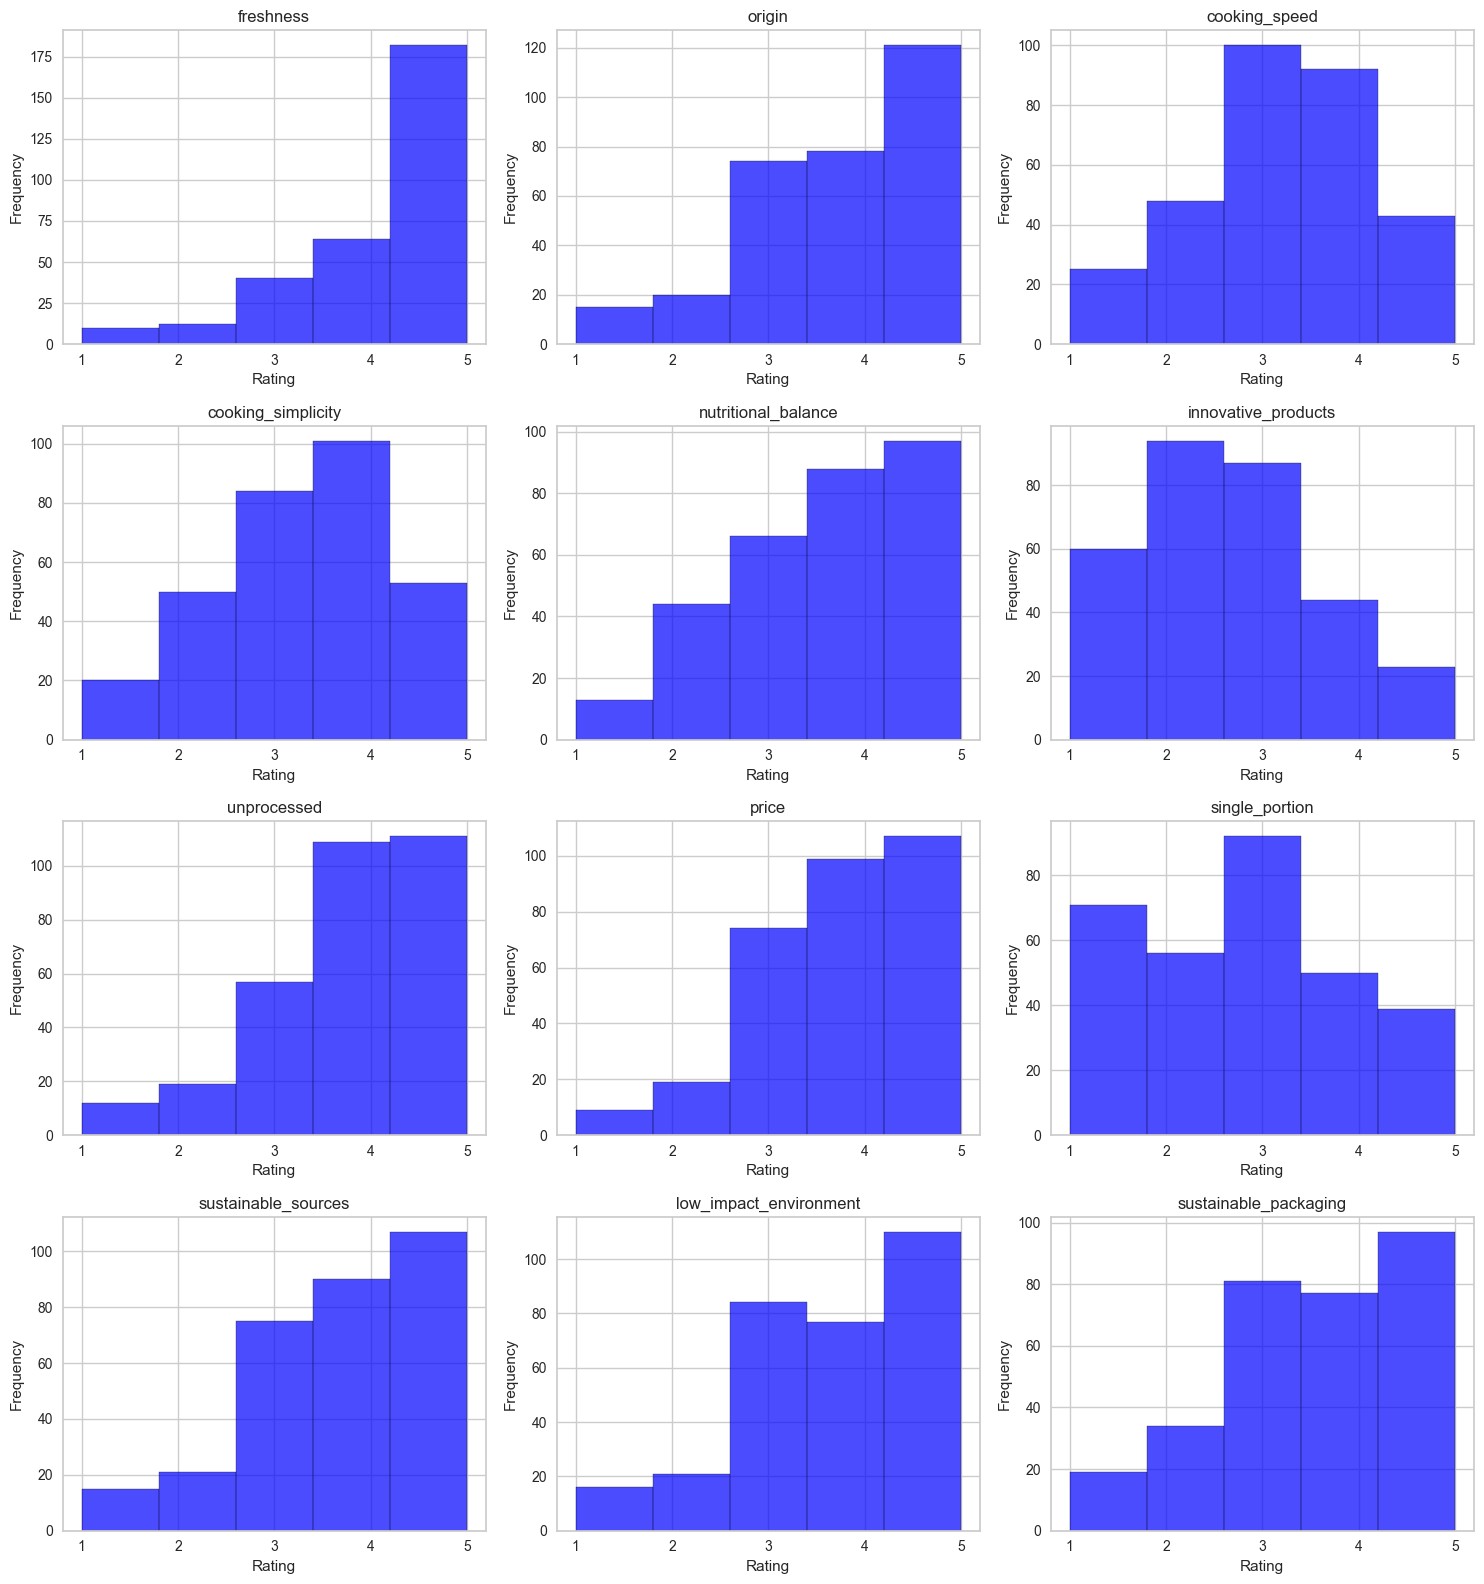

In [36]:
num_variables = len(segmentation_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(segmentation_data.columns):
    axes[index].hist(segmentation_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

## Optimal number of clusters

### Elbow method

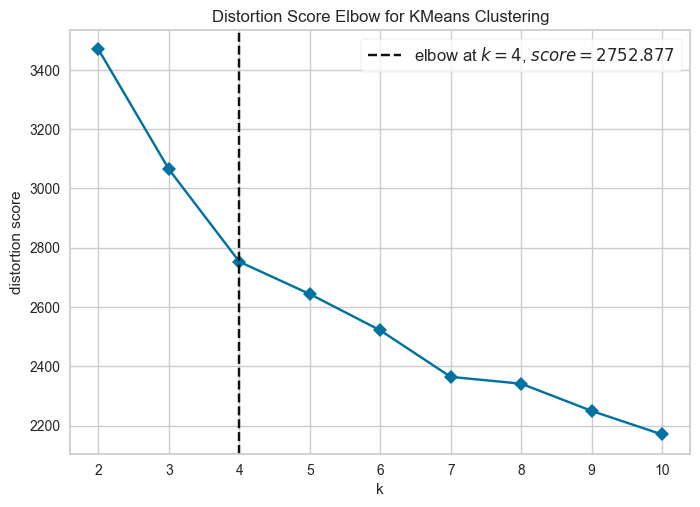

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False)
visualizer.fit(segmentation_data)
visualizer.show();

### Silhouette Score

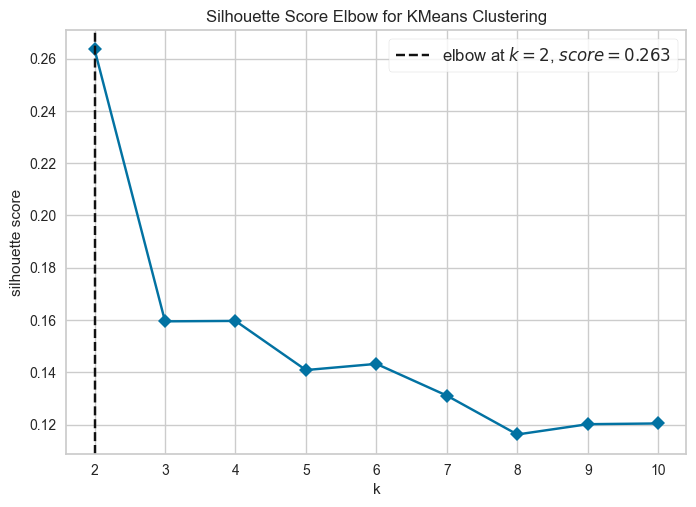

In [38]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False)
visualizer.fit(segmentation_data)
visualizer.show();

## K-Means segmentation 

Perform clustering with K=4, relabel cluster to [1, 2, 3, 4], add cluster labels back to dataset.

In [39]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(segmentation_data)
segmentation_data['Cluster'] = kmeans4.labels_ +1

segmentation_data

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging,Cluster
respondent_id,,,,,,,,,,,,,
0,4,3,3,2,4,1,2,5,2,5,4,4,2
1,5,3,4,4,3,2,4,4,4,5,5,5,4
2,5,4,3,2,5,2,3,4,4,3,3,3,1
3,5,3,2,3,4,1,5,4,1,3,3,3,2
4,5,5,5,5,4,2,5,5,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,5,5,3,3,5,5,4,5,4,4,4,5,4
342,4,3,1,1,1,2,4,5,3,4,4,4,3
343,1,1,5,5,1,1,1,5,5,1,1,1,3


**Segment sizes**

In [40]:
cluster_size = pd.DataFrame(segmentation_data.groupby("Cluster").size(),columns=["Size"]).T
cluster_size.insert(0,"Population",len(segmentation_data))
cluster_size.loc["%"] = cluster_size.iloc[0].div(cluster_size.iloc[0,0]).mul(100).astype(int)
cluster_size

Cluster,Population,1,2,3,4
Size,308,80,93,59,76
%,100,25,30,19,24


**Means of segmentation variables for each cluster**

In [41]:
segmentation_data_Means = segmentation_data.groupby("Cluster").mean().T
segmentation_data_Means.insert(0,"Population",segmentation_data.drop(columns="Cluster").mean())
segmentation_data_Means.round(2)

Cluster,Population,1,2,3,4
freshness,4.29,4.22,4.73,3.05,4.76
origin,3.88,3.42,4.42,2.53,4.74
cooking_speed,3.26,3.78,2.82,2.17,4.11
cooking_simplicity,3.38,3.99,2.91,2.27,4.17
nutritional_balance,3.69,3.62,3.88,2.24,4.64
innovative_products,2.60,2.56,2.33,1.83,3.55
unprocessed,3.94,3.79,4.33,2.66,4.59
price,3.90,4.15,3.69,3.05,4.54
single_portion,2.77,2.95,2.11,1.98,4.01
sustainable_sources,3.82,3.22,4.47,2.56,4.63


**Significance of means differences between each segment and the total sample**

In [42]:
X = segmentation_data.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment = X[X['Cluster'] == col.name]
    rest_pop = X[X['Cluster'] != col.name]
    
    colors = []
    for var_name, var_segment_mean in col.items():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        _,p_value,_ = st.ttest_ind(segment[var_name],rest_pop[var_name],usevar="unequal")    
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

segmentation_data_Means.style.apply(style_cols).format("{:.2f}")

Cluster,Population,1,2,3,4
freshness,4.29,4.22,4.73,3.05,4.76
origin,3.88,3.42,4.42,2.53,4.74
cooking_speed,3.26,3.77,2.82,2.17,4.11
cooking_simplicity,3.38,3.99,2.91,2.27,4.17
nutritional_balance,3.69,3.62,3.88,2.24,4.64
innovative_products,2.60,2.56,2.33,1.83,3.55
unprocessed,3.94,3.79,4.33,2.66,4.59
price,3.90,4.15,3.69,3.05,4.54
single_portion,2.77,2.95,2.11,1.98,4.01
sustainable_sources,3.82,3.23,4.47,2.56,4.63


## Descriptor data

The dataframe "descriptor_data" contains information about the demographic data of the respondents, as well as their consumption and purchasing habits. The variables inlcuded are the following:
- **age**: the age range of the respondent.
- **region**: the region in Italy where the respondent lives.
- **location**: the type of area the respondent lives in, such as city centre or suburbs.
- **gender**: the gender with which the respondent identifies.
- **family_members**: the number of people in the respondent's household.
- **job**: the respondent's profession.
- **consumption_frequency**: how often the respondent consumes seafood.
- **fish_type**: the type of seafood consumed most frequently at home.
- **meal_preparation_time**: the average time spent preparing meals each day.
- **grocery_responsibility**: how often the respondent is responsible for grocery shopping.
- **grocery_place**: where the respondent most often purchases seafood.
- **WTP_fish**: the amount the respondent is willing to spend on a high-quality seafood product.

In [51]:
descriptor_data = data.iloc[:,1:16]
descriptor_data = descriptor_data.drop(descriptor_data.columns[[6,7,14]], axis=1)
descriptor_data

,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Quanto spesso consumi prodotti ittici?,Che tipo di prodotti ittici consumi più frequentemente in casa?,Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?,Solitamente ti occupi tu della spesa nella tua famiglia?,Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni),Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?
respondent_id,,,,,,,,,,,,
0,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce surgelato,15-30 minuti,Raramente/Mai,Supermercato,Più di 10€
1,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Una volta a settimana,Pesce surgelato,15-30 minuti,A volte,Supermercato;Negozi specializzati (es. pescherie),5-8€
2,18-25 anni,Veneto,Centro città,Donna,1,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato;Mercati locali,5-8€
3,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,Non lo comprerei
4,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Una o due volte al mese,Pesce surgelato,15-30 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€
...,...,...,...,...,...,...,...,...,...,...,...,...
341,60-70 anni,Campania,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce surgelato,30-60 minuti,A volte,Supermercato,Non lo comprerei
342,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,5-8€
343,26-35 anni,Lazio,Centro città,Uomo,1,Lavoratore,Una o due volte al mese,Pesce in scatola,Meno di 15 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€


In [52]:
descriptor_data.columns

Index(['Qual è la tua età?', 'In che regione vivi?', 'In che zona abiti?',
       'Con quale genere ti identifichi?',
       'Da quanti componenti è formato il tuo nucleo familiare?',
       'Qual è la tua professione?', 'Quanto spesso consumi prodotti ittici?',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?',
       'Solitamente ti occupi tu della spesa nella tua famiglia?',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?'],
      dtype='object')

In [53]:
# rename columns
new_names = { 'Qual è la tua età?': 'age', 
              'In che regione vivi?':'region', 
              'In che zona abiti?': 'location',
       'Con quale genere ti identifichi?' : 'gender',
       'Da quanti componenti è formato il tuo nucleo familiare?' : 'family_members',
       'Qual è la tua professione?': 'job',
        'Quanto spesso consumi prodotti ittici?': 'consumption_frequency',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?': 'fish_type',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?' : 'meal_preparation_time',
       'Solitamente ti occupi tu della spesa nella tua famiglia?': 'grocery_responsibility',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ': 'grocery_place',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?': 'WTP_fish'
    
}

descriptor_data = descriptor_data.rename(columns=new_names)
descriptor_data

,age,region,location,gender,family_members,job,consumption_frequency,fish_type,meal_preparation_time,grocery_responsibility,grocery_place,WTP_fish
respondent_id,,,,,,,,,,,,
0,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce surgelato,15-30 minuti,Raramente/Mai,Supermercato,Più di 10€
1,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Una volta a settimana,Pesce surgelato,15-30 minuti,A volte,Supermercato;Negozi specializzati (es. pescherie),5-8€
2,18-25 anni,Veneto,Centro città,Donna,1,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato;Mercati locali,5-8€
3,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,Non lo comprerei
4,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Una o due volte al mese,Pesce surgelato,15-30 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€
...,...,...,...,...,...,...,...,...,...,...,...,...
341,60-70 anni,Campania,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce surgelato,30-60 minuti,A volte,Supermercato,Non lo comprerei
342,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,5-8€
343,26-35 anni,Lazio,Centro città,Uomo,1,Lavoratore,Una o due volte al mese,Pesce in scatola,Meno di 15 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€


**Add cluster labels**

In [54]:
descriptor_data['Cluster'] = segmentation_data['Cluster']
descriptor_data

,age,region,location,gender,family_members,job,consumption_frequency,fish_type,meal_preparation_time,grocery_responsibility,grocery_place,WTP_fish,Cluster
respondent_id,,,,,,,,,,,,,
0,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce surgelato,15-30 minuti,Raramente/Mai,Supermercato,Più di 10€,2
1,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Una volta a settimana,Pesce surgelato,15-30 minuti,A volte,Supermercato;Negozi specializzati (es. pescherie),5-8€,4
2,18-25 anni,Veneto,Centro città,Donna,1,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato;Mercati locali,5-8€,1
3,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,Non lo comprerei,2
4,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Una o due volte al mese,Pesce surgelato,15-30 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,60-70 anni,Campania,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce surgelato,30-60 minuti,A volte,Supermercato,Non lo comprerei,4
342,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,5-8€,3
343,26-35 anni,Lazio,Centro città,Uomo,1,Lavoratore,Una o due volte al mese,Pesce in scatola,Meno di 15 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€,3


**Pie charts of the distribution of variables across each cluster**

C:\Users\Pancione\AppData\Local\Temp\ipykernel_38460\2892629962.py:22: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Temp\ipykernel_38460\2892629962.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\Pancione\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


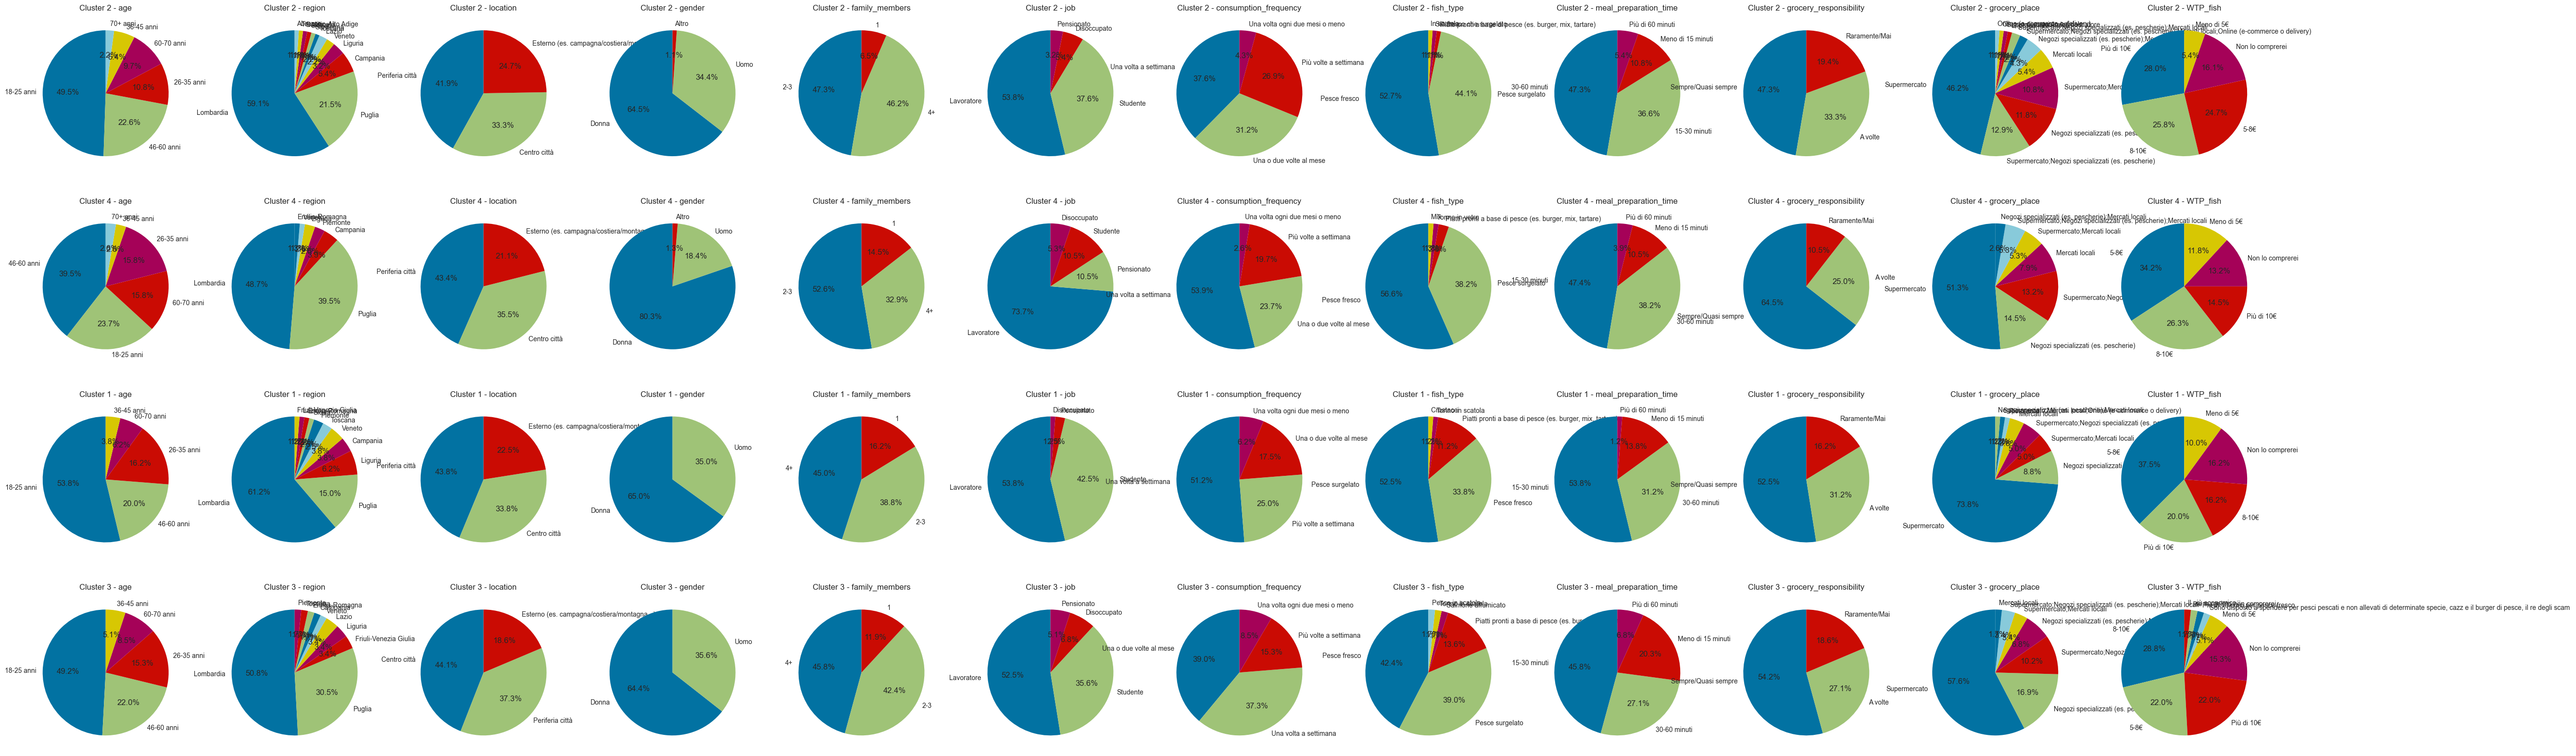

In [56]:
clusters = descriptor_data['Cluster'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))  # Adjust size as needed

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster'] == cluster]
    for j, var in enumerate(variables):
        # Get value counts for the variable in the current cluster
        counts = cluster_data[var].value_counts()
        # Create the pie chart
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()